In [2]:
import anndata as ad
import numpy as np
import scanpy as sc
import pandas as pd
import openpyxl
import csv
import matplotlib
import scipy.stats as sp
import xgboost as xgb
import pickle
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import matplotlib.pyplot as plt
from matplotlib import gridspec
import scrublet as scr
import scvelo as scv
import loompy
from scipy.stats import zscore
from scipy import sparse 
import itertools
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from umap import UMAP
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances_argmin
import seaborn as sns

In [3]:
N_HIP_list = ['H:/Tan_single_cell/velocyto/N1_HIP.loom','H:/Tan_single_cell/velocyto/N2_HIP.loom']
D_HIP_list = ['H:/Tan_single_cell/velocyto/D1_HIP.loom','H:/Tan_single_cell/velocyto/D2_HIP.loom']
loompy.combine(N_HIP_list, 'N_HIP.loom',key='Accession')
loompy.combine(D_HIP_list, 'D_HIP.loom',key='Accession')

In [3]:
N_HIP_loom = scv.read('N_HIP.loom',cache=True)
D_HIP_loom = scv.read('D_HIP.loom',cache=True)

In [6]:
N_HIP = scv.read('NR_DG.h5ad',cache=True)
D_HIP = scv.read('DR_DG.h5ad',cache=True)

In [7]:
N_HIP.obs.to_csv('N_HIP.csv')
D_HIP.obs.to_csv('D_HIP.csv')
#N_HIP_loom.obs.to_csv('N_HIP_loom.csv')
#D_HIP_loom.obs.to_csv('D_HIP_loom.csv')

In [8]:
N_h5ad_short_name = pd.read_csv('N_HIP.csv',index_col='cell_id')
N_loom_short_name = pd.read_csv('N_HIP_loom.csv',index_col='cell_id')
N_HIP.obs['short_name'] = N_h5ad_short_name
N_HIP_loom.obs['short_name'] = N_loom_short_name
N_HIP.write_h5ad('NR_HIP_short.h5ad')
N_HIP_loom.write_h5ad('NR_HIP_short.loom')

In [9]:
D_h5ad_short_name = pd.read_csv('D_HIP.csv',index_col='cell_id')
D_loom_short_name = pd.read_csv('D_HIP_loom.csv',index_col='cell_id')
D_HIP.obs['short_name'] = D_h5ad_short_name
D_HIP_loom.obs['short_name'] = D_loom_short_name
D_HIP.write_h5ad('DR_HIP_short.h5ad')
D_HIP_loom.write_h5ad('DR_HIP_short.loom')

In [10]:
N_HIP_cell = N_HIP.obs['short_name'].tolist()
D_HIP_cell = D_HIP.obs['short_name'].tolist()

In [11]:
N_HIP_filtered_ldata = N_HIP_loom[N_HIP_loom.obs['short_name'].isin(N_HIP_cell)]
D_HIP_filtered_ldata = D_HIP_loom[D_HIP_loom.obs['short_name'].isin(D_HIP_cell)]

In [12]:
N_HIP_V= scv.utils.merge(N_HIP,N_HIP_filtered_ldata)
D_HIP_V= scv.utils.merge(D_HIP,D_HIP_filtered_ldata)
N_HIP_V, D_HIP_V

(AnnData object with n_obs × n_vars = 4979 × 21112
     obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Sample', 'leiden_res_0.80', 'leiden_res_1.00', 'leiden_res_1.50', 'Class', 'Subclass', 'leiden_res_0.20', 'leiden_res_0.30', 'leiden_res_0.40', 'leiden_res_0.50', 'Type', 'leiden_res_0.60', 'leiden_res_0.70', 'short_name', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
     var: 'gene_ids', 'feature_types', 'n_cells-HIP_1', 'highly_variable-HIP_1', 'means-HIP_1', 'dispersions-HIP_1', 'dispersions_norm-HIP_1', 'n_cells-HIP_2', 'highly_variable-HIP_2', 'means-HIP_2', 'dispersions-HIP_2', 'dispersions_norm-HIP_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
     uns: 'Class_colors', 'Sample_colors', 'Subclass_colors', 'dendrogram_Type', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_0.20', 'leiden_res_0.20_colors', 'leiden_res_0.30', 'leiden_res_0

In [13]:
N_HIP_V.write_h5ad('NR_DG_V.h5ad')
D_HIP_V.write_h5ad('DR_DG_V.h5ad')

In [12]:
N_HIP_G = N_HIP_V[N_HIP_V.obs['Class']=='Glut']

In [13]:
D_HIP_G = D_HIP_V[D_HIP_V.obs['Class']=='Glut']

In [16]:
#sc.pp.highly_variable_genes(N_DG, min_mean=0.0125, max_mean=3, min_disp=0.5,flavor='seurat')
HVG_N_L23 = N_HIP_V[:,N_HIP_V.var.highly_variable]

In [17]:
#sc.pp.highly_variable_genes(D_DG, min_mean=0.0125, max_mean=3, min_disp=0.5,flavor='seurat')
HVG_D_L23 = D_HIP_V[:,D_HIP_V.var.highly_variable]

In [18]:
HVG_N_L23,HVG_D_L23

(View of AnnData object with n_obs × n_vars = 4979 × 2769
     obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'predicted_doublet', 'Sample', 'leiden_res_0.80', 'leiden_res_1.00', 'leiden_res_1.50', 'Class', 'Subclass', 'leiden_res_0.20', 'leiden_res_0.30', 'leiden_res_0.40', 'leiden_res_0.50', 'Type', 'leiden_res_0.60', 'leiden_res_0.70', 'short_name', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
     var: 'gene_ids', 'feature_types', 'n_cells-HIP_1', 'highly_variable-HIP_1', 'means-HIP_1', 'dispersions-HIP_1', 'dispersions_norm-HIP_1', 'n_cells-HIP_2', 'highly_variable-HIP_2', 'means-HIP_2', 'dispersions-HIP_2', 'dispersions_norm-HIP_2', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
     uns: 'Class_colors', 'Sample_colors', 'Subclass_colors', 'dendrogram_Type', 'dendrogram_leiden_res_1.50', 'hvg', 'leiden_res_0.20', 'leiden_res_0.20_colors', 'leiden_res_0.30', 'leide

In [19]:
HVG_N_L23.write_h5ad('HVG_N_L23.h5ad')
HVG_D_L23.write_h5ad('HVG_D_L23.h5ad')

In [20]:
scv.pp.filter_and_normalize(HVG_N_L23)
#scv.pp.pca(N_V1_Glut_V)
scv.pp.moments(HVG_N_L23,n_pcs=30,n_neighbors=30)
#scv.tl.umap(N_V1_Glut_V)
scv.tl.recover_dynamics(HVG_N_L23)
scv.tl.velocity(HVG_N_L23,mode='dynamical')
scv.tl.velocity_graph(HVG_N_L23)

Normalized count data: spliced, unspliced.
Logarithmized X.
computing neighbors


E:\Python\lib\site-packages\scvelo\preprocessing\utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/24 cores)


  0%|          | 0/50 [00:00<?, ?gene/s]

    finished (0:00:21) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/24 cores)


  0%|          | 0/4979 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file ./figures/scvelo_HIP_NR_DG_scvelo.pdf


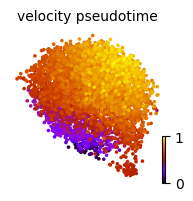

saving figure to file ./figures/scvelo_HIP_NR_DG_scelltype.pdf


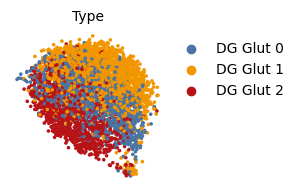

In [7]:
scv.pl.scatter(HVG_N_L23, color='velocity_pseudotime',cmap='gnuplot',legend_loc='right margin',figsize=(2,2),save='HIP_NR_DG_scvelo.pdf')
scv.pl.umap(HVG_N_L23, color='Type',palette=["#4974a4","#f29600","#b81316"],figsize=(2,2),save='HIP_NR_DG_scelltype.pdf')

In [52]:
HVG_N_L23.obs['velocity_pseudotime'].to_csv('HVG_N_L23_pseudotime.csv')

In [8]:
HVG_N_L23.write_h5ad('HVG_N_DG_V.h5ad')

In [10]:
scv.pp.filter_and_normalize(HVG_D_L23)
#scv.pp.pca(N_V1_Glut_V)
scv.pp.moments(HVG_D_L23,n_pcs=30,n_neighbors=30)
#scv.tl.umap(N_V1_Glut_V)
scv.tl.recover_dynamics(HVG_D_L23)
scv.tl.velocity(HVG_D_L23,mode='dynamical')
scv.tl.velocity_graph(HVG_D_L23)

Normalized count data: spliced, unspliced.
Logarithmized X.
computing neighbors


E:\Python\lib\site-packages\scvelo\preprocessing\utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/24 cores)


  0%|          | 0/31 [00:00<?, ?gene/s]

    finished (0:00:20) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/24 cores)


  0%|          | 0/5327 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file ./figures/scvelo_HIP_DR_DG_scvelo.pdf


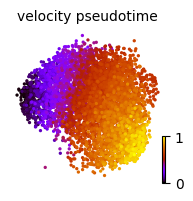

saving figure to file ./figures/scvelo_HIP_DR_DG_scelltype.pdf


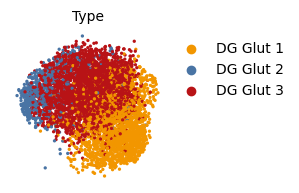

In [15]:
scv.tl.velocity_pseudotime(HVG_D_L23,root_key='ACTATTCGTCGG',end_key='ATGCCTCCACTT')#ACAGCCGCATAAGATG
scv.pl.scatter(HVG_D_L23, color='velocity_pseudotime',cmap='gnuplot',legend_loc='right margin',figsize=(2,2),save='HIP_DR_DG_scvelo.pdf')
scv.pl.umap(HVG_D_L23, color='Type',palette=["#f29600","#4974a4","#b81316"],figsize=(2,2),save='HIP_DR_DG_scelltype.pdf')

In [51]:
HVG_D_L23.obs['velocity_pseudotime'].to_csv('HVG_D_DG_pseudotime.csv')